# TASK_3: SPAM SMS DETECTION

In [23]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm

In [3]:
data = pd.read_csv('spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Preprocess The Data

In [5]:
data.drop_duplicates(inplace=True)
data['label'] = data['v1'].map({'ham':'ham', 'spam': 'spam'})
x = data['v2']
y = data['label']

In [12]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

In [13]:
tfidf_vectorizer = TfidfVectorizer()
x_train_tfidf =tfidf_vectorizer.fit_transform(x_train)

In [14]:
classifier = MultinomialNB()
classifier.fit(x_train_tfidf, y_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)
y_pred = classifier.predict(x_test_tfidf)

# Calculate Accuracy

In [17]:
accuracy = accuracy_score(y_test, y_pred)

In [36]:
report = classification_report(y_test,y_pred, target_names=['Legitimate SMS', 'Spam SMS'])
progress_bar = tqdm(total=100, position=0, leave=True)
accuracies=[]

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

Progress: 100%: 100%|████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 48.29it/s]


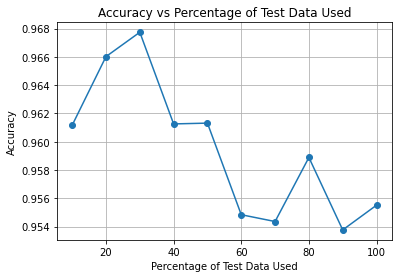

Accuracy: 0.96
Classification Report:
                precision    recall  f1-score   support

Legitimate SMS       0.95      1.00      0.97       889
      Spam SMS       1.00      0.68      0.81       145

      accuracy                           0.96      1034
     macro avg       0.98      0.84      0.89      1034
  weighted avg       0.96      0.96      0.95      1034



In [37]:
for i in range(10, 101, 10):
    progress_bar.update(10)
    progress_bar.set_description(f'Progress: {i}%')
    
    # Update the number of samples to use
    num_samples = int(len(x_test) * i / 100)
    x_test_tfidf_partial = x_test_tfidf[:num_samples]
    y_test_partial = y_test[:num_samples]
    
    # Predict with the partial data
    y_pred_partial = classifier.predict(x_test_tfidf_partial)
    
    # Calculate accuracy
    partial_accuracy = accuracy_score(y_test_partial, y_pred_partial)
    accuracies.append(partial_accuracy)

progress_bar.close()

# Plotting the graph
percentages = range(10, 101, 10)
plt.plot(percentages, accuracies, marker='o')
plt.xlabel('Percentage of Test Data Used')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Percentage of Test Data Used')
plt.grid(True)
plt.show()

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)